In [33]:
import pandas as pd
import numpy as np
import scipy.stats as scp
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('cps99_ps3.csv')

,ahe,female,ne,midwest,south,west,race,yrseduc,ba,hsdipl,age
0,10.754048,1,1,0,0,0,1,18,1,1,49
1,10.341881,0,1,0,0,0,1,16,1,1,28
2,18.181818,0,1,0,0,0,1,12,0,1,45
3,20.879122,1,1,0,0,0,1,12,0,1,41
4,17.948717,0,1,0,0,0,1,18,1,1,54
...,...,...,...,...,...,...,...,...,...,...,...
37805,41.208790,0,0,0,0,1,4,19,1,1,51
37806,21.634615,0,0,0,0,1,4,16,1,1,44
37807,8.636364,1,0,0,0,1,4,14,0,1,44
37808,10.544871,0,0,0,0,1,4,13,0,1,33


In [27]:
ahe = data.ahe.values
yrseduc = data.yrseduc.values
ahe_mean = ahe.mean()
yrseduc_mean = yrseduc.mean()

beta1 = sum([yrseduc[i]*(ahe[i] - ahe_mean) for i in range(len(ahe))]) / sum([yrseduc[i]*(yrseduc[i] - yrseduc_mean) for i in range(len(yrseduc))])
beta0 = ahe_mean - beta1*yrseduc_mean

In [98]:
print(f"a) Коэффициент при yrseduc: {beta1}.\nЭто означает то, что средний заработок человека растет с каждым годом обучения на {beta1}.\nЛюди с высоким образованием зарабатывают больше денег.")

a) Коэффициент при yrseduc: 1.334197490847233.
Это означает то, что средний заработок человека растет с каждым годом обучения на 1.334197490847233.
Люди с высоким образованием зарабатывают больше денег.


b)


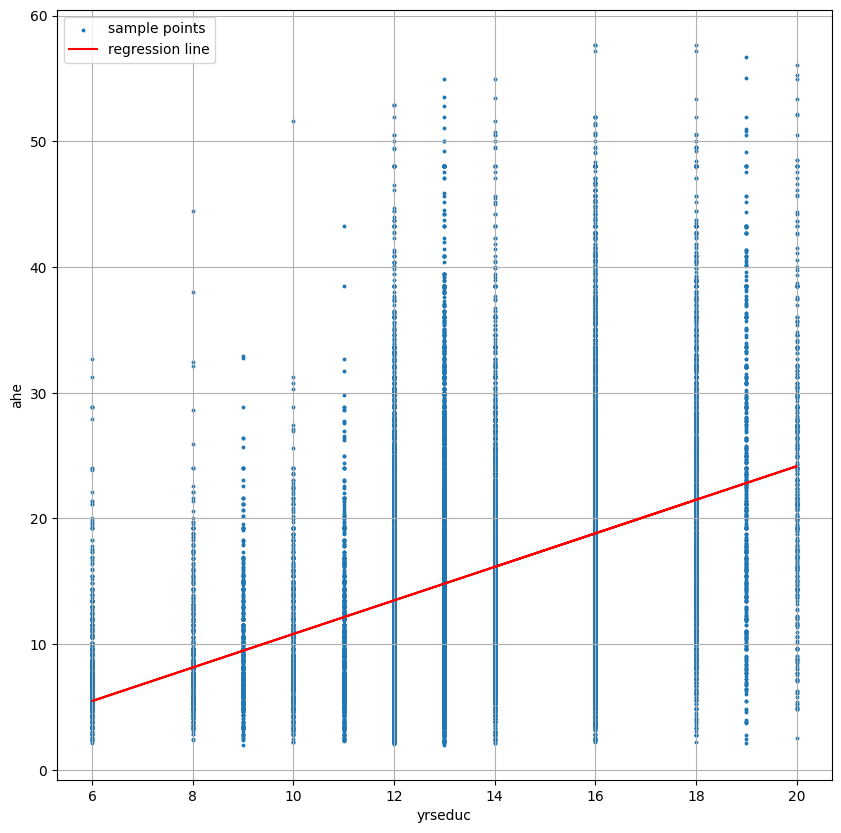

In [55]:
print("b)")
fig = plt.figure(figsize=(10,10))
plt.scatter(yrseduc, ahe, np.pi, label="sample points")
plt.plot(yrseduc, beta0 + beta1*yrseduc, color='red', label='regression line')
plt.ylabel("ahe")
plt.xlabel("yrseduc")
plt.grid()
plt.legend()

In [99]:
residuals = ahe - (beta0 + beta1*yrseduc)
std_residuals = np.std(residuals, ddof=1)
t_stat = beta1 / (std_residuals / np.sqrt(np.sum((yrseduc - yrseduc_mean)**2)))
p_value = 2*(1 - scp.t.cdf(t_stat, len(yrseduc) - 2))
print("c)")
if p_value < 0.05: 
    print("Да, коэффициент наклона является статистически отличным от нуля.")
else:
    print("Нет, коэффициент наклона не является статистически отличным от нуля.")

c)
Да, коэффициент наклона является статистически отличным от нуля.


In [100]:
alpha = 0.05
s_error = std_residuals / np.sqrt(np.sum((yrseduc - yrseduc_mean)**2))
left = beta1 - scp.t.ppf(1 - alpha/2, df=len(yrseduc) - 2) * s_error
right = beta1 + scp.t.ppf(1 - alpha/2, df=len(yrseduc) - 2) * s_error
print(f"d) 95%-ный доверительный интервал для коэффициента наклона регрессии: [{left}; {right}]")

d) 95%-ный доверительный интервал для коэффициента наклона регрессии: [1.304005717445044; 1.364389264249422]


In [83]:
SST = np.sum((ahe - ahe_mean)**2)
SSE = np.sum((beta0 + beta1*yrseduc - np.mean(beta0 + beta1*yrseduc))**2)
R2 = SSE / SST
print(f"e) R^2 регрессии равен {R2}.\nЭто значит, что только 16.6% изменений в среднем заработке можно объяснить количеством лет обучения.")

e) R^2 регрессии равен 0.1655700163705476.
Это значит, что только 16.6% изменений в среднем заработке можно объяснить количеством лет обучения.


In [96]:
corr = data.ahe.corr(data.yrseduc)
print(f"f) Корреляция между ahe и yrseduc = {corr}.\nКвадрат корреляции равна R^2 с точностью больше миллиардных: {corr**2} = {R2}")

f) Корреляция между ahe и yrseduc = 0.40690295694480744.
Квадрат корреляции равна R^2 с точностью больше миллиардных: 0.1655700163704278 = 0.1655700163705476


In [97]:
print("g) Ошибка регрессии в модели является гетероскедастичной")

g) Ошибка регрессии в модели является гетероскедастичной
